# Extracting embbeded vectors of pdbx_details

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:


logging.info('hi')

In [25]:
pd.DataFrame([{'b': 9}]).to_csv('temp.csv', mode='a')

In [16]:
path = '/home/ofir/ofir_code/crystoper/data/pdb_data/processed_data.csv'
df = pd.read_csv(path)

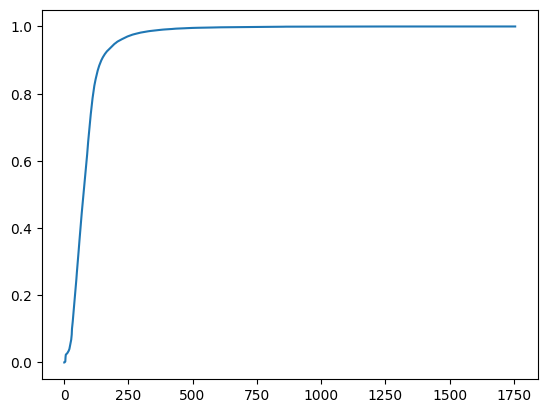

In [17]:
cumsum = df.pdbx_details.str.len().value_counts().sort_index().cumsum() / len(df)
plt.plot(cumsum)

In [14]:
cumsum[250]

np.float64(0.9710522292077026)

In [26]:
data_path = '/home/ofir/ofir_code/crystoper/data/pdb_data/processed_data.csv'
sentences = pd.read_csv(data_path).pdbx_details
sentences

0         HEPES pH7.5, PAA (poly acrilic acid) 20%, MgCl...
1         80-120mM MgCl2, 8% glycerol, 10% PEG 3350, 100...
2            40% PEG400, 0.1M NaCitrate, 0.1M Tris-HCl, 7.5
3            40% PEG400, 0.1M NaCitrate, 0.1M Tris-HCl, 7.5
4            40% PEG400, 0.1M NaCitrate, 0.1M Tris-HCl, 7.5
                                ...                        
222361    phosphate, imidazole, pH 7.0, VAPOR DIFFUSION,...
222362                100 mM MES\n15% glycerol\n15% PEG6000
222363    1.45M sodium malonate, 0.5% (w/v) Jeffamine ED...
222364    23% PEG3350, 100 mM Tris-HCl, pH 8.6, 200 mM m...
222365    1.2 M sodium citrate and 20% (w/v) PEG 8K, pH ...
Name: pdbx_details, Length: 222366, dtype: object

In [29]:
for s in sentences.iloc[0::5000]:
    print(s)

HEPES pH7.5, PAA (poly acrilic acid) 20%, MgCl2 20 mM
PEG 8000, CaCl2, MOPS, 1,10-decanedioic acid, pH 7.0, VAPOR DIFFUSION, HANGING DROP, temperature 298K
10% w/v PEG 4000, 20% v/v glycerol, 0.03 M sodium fluoride, 0.03 M sodium bromide, 0.03 M sodium iodide, 0.1 M bicine/Trizma base pH 8.5, VAPOR DIFFUSION, SITTING DROP, temperature 277K
20%(v/v) PEG 4000, 100mM MES pH 7.0, 600mM NaCl, 5% (v/v) Jeffamine M-600, VAPOR DIFFUSION, HANGING DROP, temperature 277K
0.2M lithium sulphate, 0.1M Tris, 30% w/v PEG 4K, pH 8.5, NAD+ (0.09mM)
0.1 M Hepes-NaOH pH 6.5
0.9 M Na-Malonate
0.25 % (v/v) Jeffamine ED-2003
100 mM sodium cacodylate pH 5.5-7.0, 0.2 M magnesium acetate, 15-30% PEG 8000
tris hydrochloride pH 7.8, magnesium acetate tetrahydrate, PEG 8000 and benzamidine
1M NA/K PHOSPHATE PH3.2
potassium dihydrogen phosphate, PEG 8000, glycerol, glucose, pH 5.1, VAPOR DIFFUSION, SITTING DROP, temperature 293K
19% (v/v) Isopropanol, 19% (w/v) PEG 4000, 5% (v/v) Glycerol, 0.095 M Sodium citrate pH

In [3]:
vec_path = '/home/ofir/ofir_code/crystoper/vectors/details/bart.npy'
generated_tokens = np.load(vec_path)

In [4]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BartTokenizer, BartModel, BartForConditionalGeneration

generation_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')
    # Decode the generated tokens back into sentences


/home/ofir/.pyenv/versions/3.10.13/envs/crystoEnv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')


In [18]:
v = generated_tokens[0]
v = torch.from_numpy(v).reshape(1,-1).shape

In [20]:
tokenizer.decode(v)

'<pad> officers'